# Imports

In [2]:
from sklearnex import patch_sklearn # Otimizar sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# Redução de dimensionalidade
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt

# Scatter

In [4]:
colors = {
	'Entertainment': 'red',
	'Independence': 'orange',
	'Machine Learning': 'green',
	'News': 'blue',
	'Science': 'purple',
	'Software Development': 'brown',
	'Sprituality': 'gray',
	'Wellness': 'cyan'
}

In [5]:
reducao_dimensionalidade = {
	'TSNE': lambda x: TSNE(n_components=2, init='random', verbose=1).fit_transform(x),
	'PCA': lambda x: PCA(n_components=2).fit_transform(x)
}

In [6]:
dados_reducao_dimensionalidade = {
	'TFIDF': {
		'PCA': {},
		'TSNE': {}
	},
	'BOW': {
		'PCA': {},
		'TSNE': {}
	},
}

## Carregar dados de representações

In [7]:
representacoes_vetoriais = ['TFIDF', 'BOW']
reducoes_dimensionalidade = ['TSNE', 'PCA']
threads = []

# Dados usados durante scatter de representação vetorial + redução de dimensionalidade
def setup_data(representation, dimension_reduction, topic):
	print(f'{representation=} {dimension_reduction=} {topic=}')
	data = pd.read_feather(f'./smote/{representation}/{topic}.feather').drop(columns=['Topic'])
	if not dados_reducao_dimensionalidade[representation][dimension_reduction].get(topic):
		dados_reducao_dimensionalidade[representation][dimension_reduction][topic] = reducao_dimensionalidade[dimension_reduction](data)

for dimension_reduction in reducoes_dimensionalidade:
	for representation in representacoes_vetoriais:
		for topic in colors:
			setup_data(representation, dimension_reduction, topic)

representation='TFIDF' dimension_reduction='TSNE' topic='Entertainment'
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 678 samples in 0.224s...
[t-SNE] Computed neighbors for 678 samples in 0.498s...
[t-SNE] Computed conditional probabilities for sample 678 / 678
[t-SNE] Mean sigma: 0.280967
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.362740
[t-SNE] KL divergence after 1000 iterations: 1.701306
representation='TFIDF' dimension_reduction='TSNE' topic='Independence'
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 678 samples in 0.224s...
[t-SNE] Computed neighbors for 678 samples in 0.492s...
[t-SNE] Computed conditional probabilities for sample 678 / 678
[t-SNE] Mean sigma: 0.383223
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.544144
[t-SNE] KL divergence after 1000 iterations: 0.882205
representation='TFIDF' dimension_reduction='TSNE' topic='Machine Learning'
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Ind

Exception: !

## Desenhar scatter com todos os dados juntos

In [26]:
# representation = 'TFIDF'
representation = 'BOW'

# reduction = 'TSNE'
reduction = 'PCA'

xlim, ylim = (-20, 100), (-50, 100)
# xlim, ylim = None, None


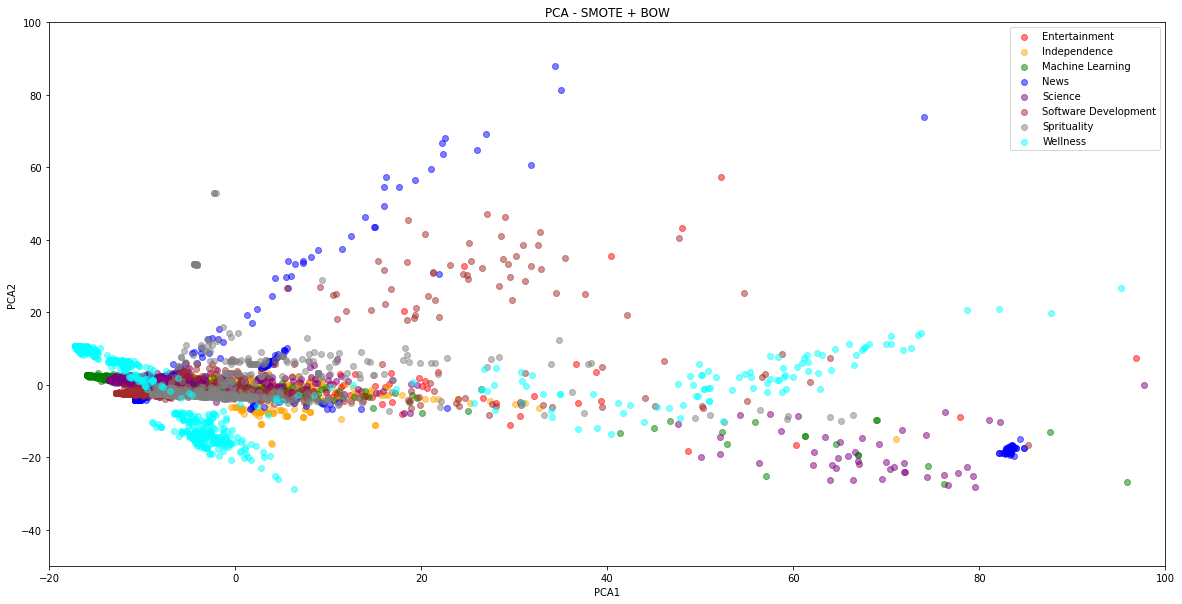

In [27]:
plt.figure(figsize=(20, 10))

for topic in colors:
	data = pd.read_feather(f'./smote/{representation}/{topic}.feather').drop(columns=['Topic'])

	plt.scatter(
		[y[0] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		[y[1] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		color=colors[topic],
		alpha=0.5,
		label=topic
	)

plt.title(f'{reduction} - SMOTE + {representation}')
plt.xlabel(f'{reduction}1')
plt.ylabel(f'{reduction}2')

if all([xlim, ylim]):
	plt.xlim(xlim)
	plt.ylim(ylim)

plt.legend()
plt.savefig(f'img/{representation}/{reduction}/{reduction.lower()}-smote-{representation.lower()}-all.png')

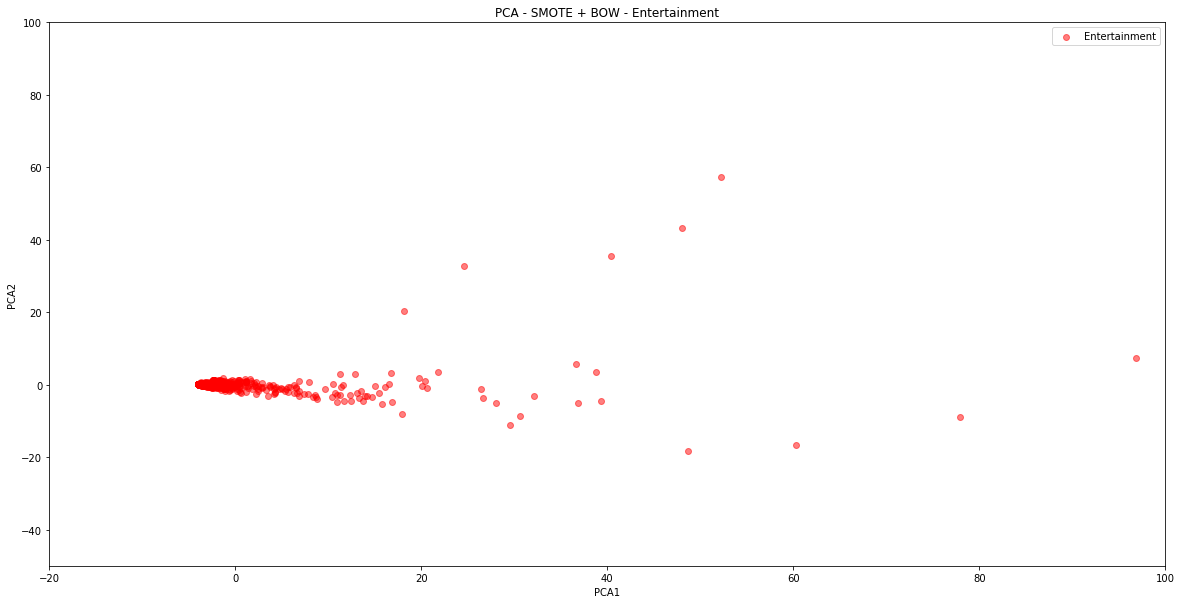

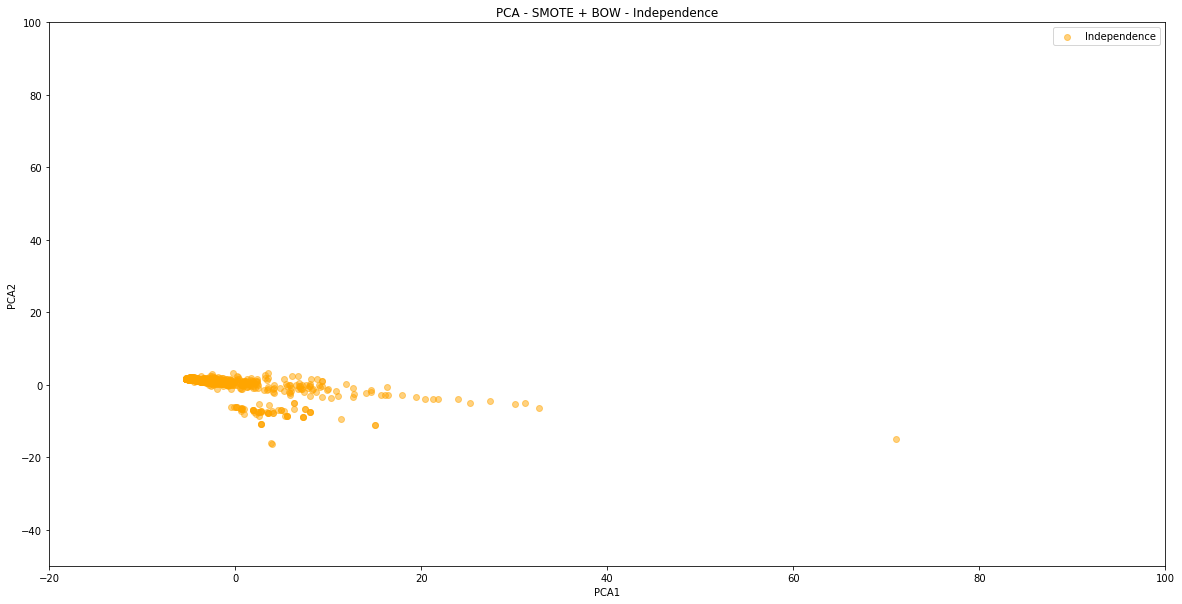

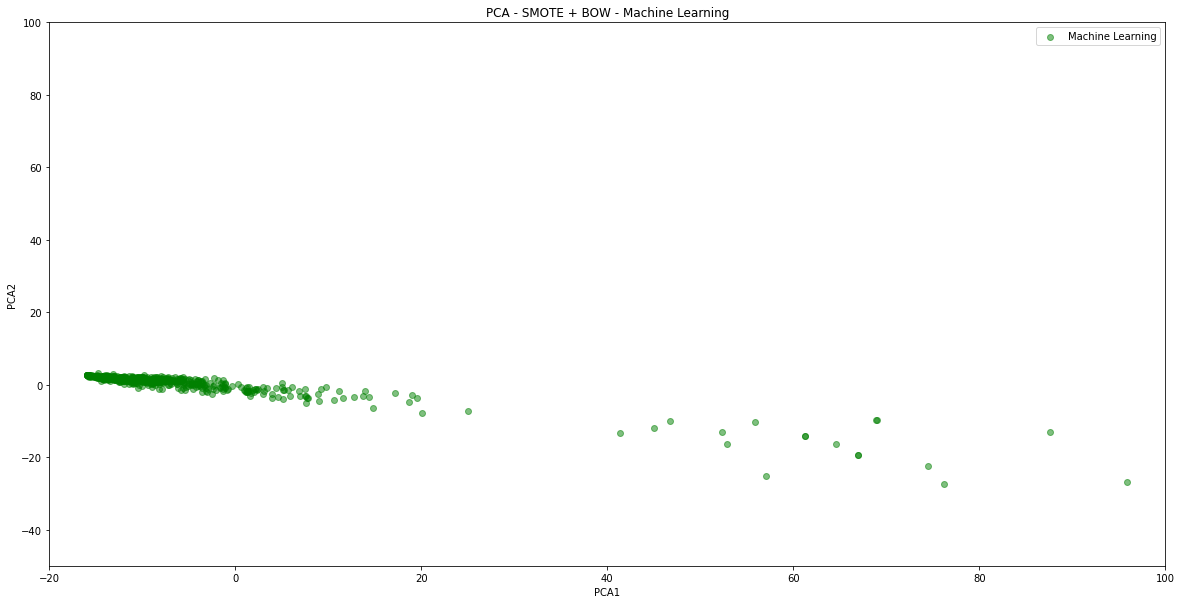

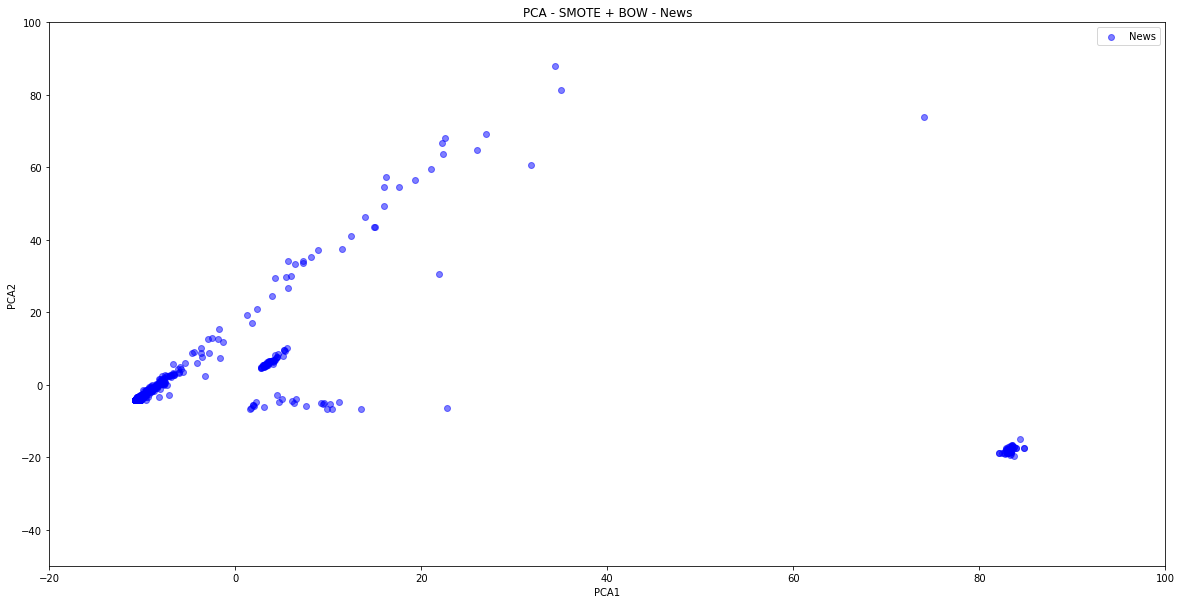

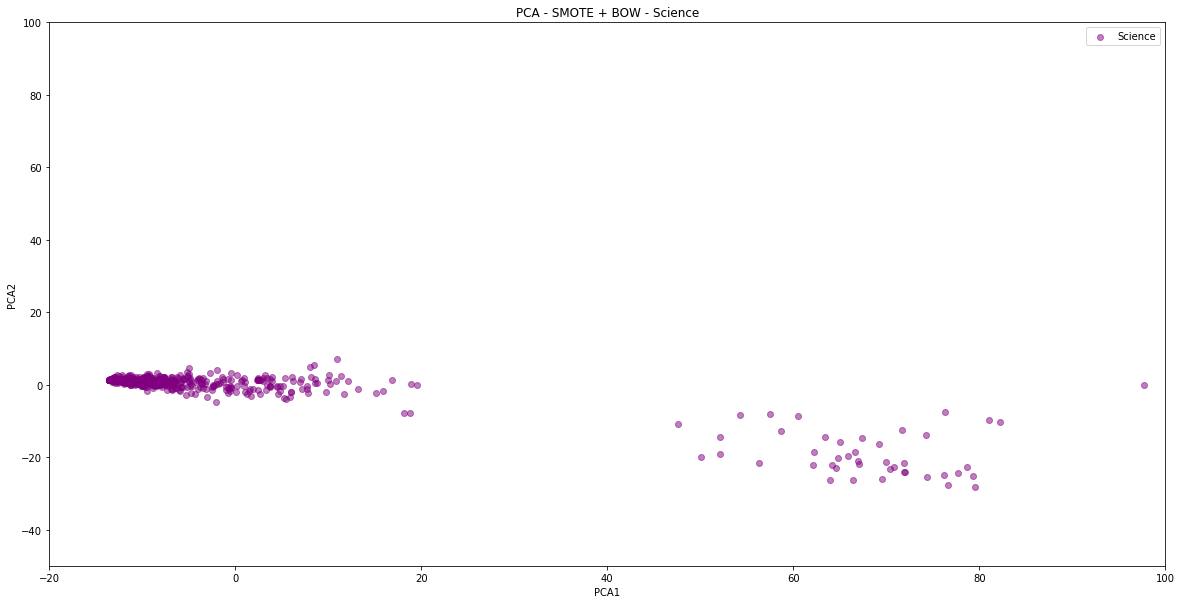

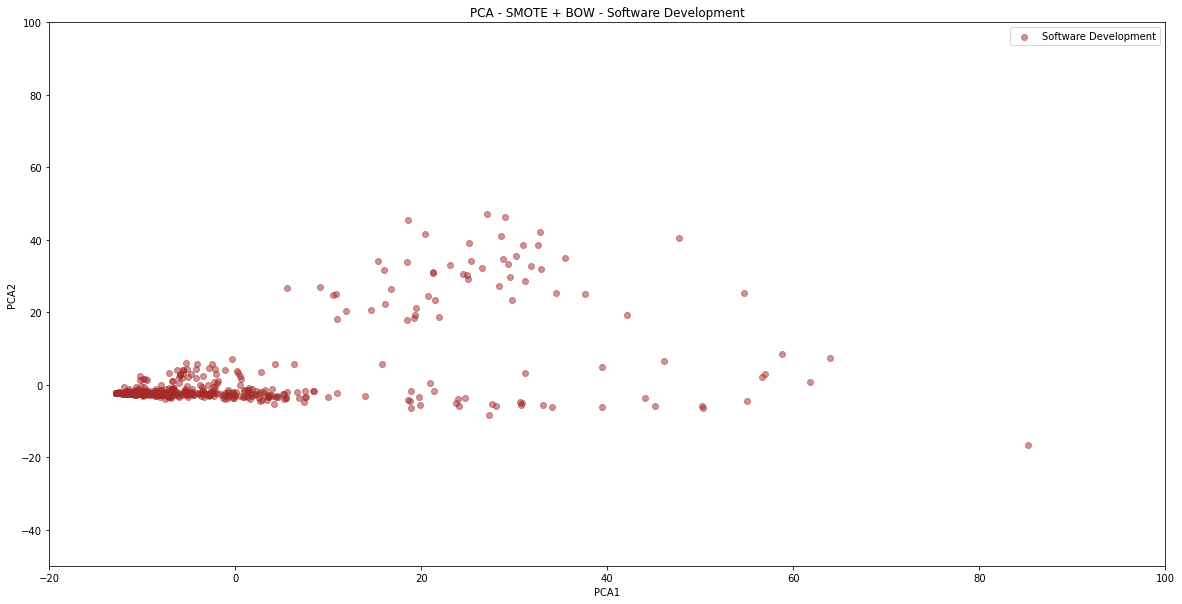

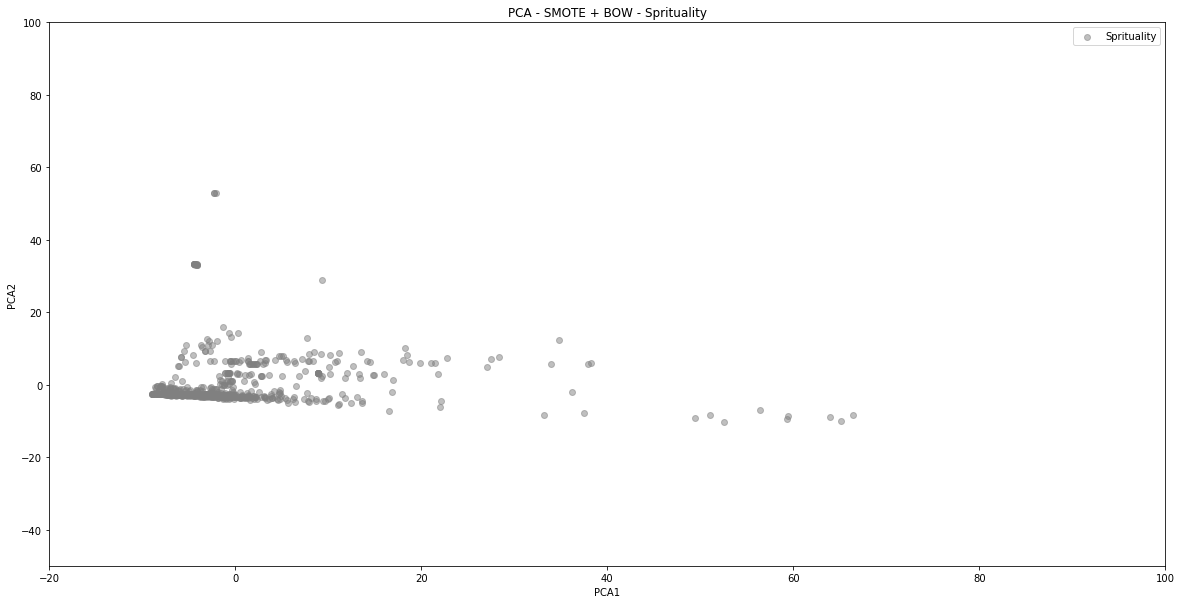

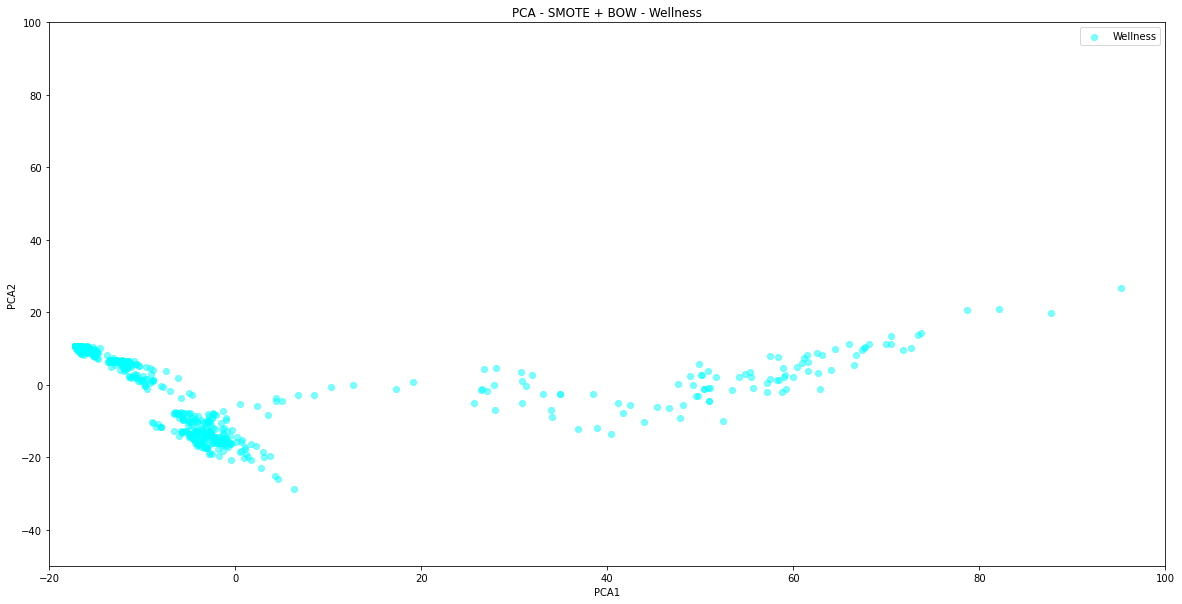

In [28]:
for topic in colors:
	data = pd.read_feather(f'./smote/{representation}/{topic}.feather').drop(columns=['Topic'])

	plt.figure(figsize=(20, 10))

	plt.scatter(
		[y[0] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		[y[1] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		color=colors[topic],
		alpha=0.5,
		label=topic
	)

	plt.title(f'{reduction} - SMOTE + {representation} - {topic}')
	plt.xlabel(f'{reduction}1')
	plt.ylabel(f'{reduction}2')

	if all([xlim, ylim]):
		plt.xlim(xlim)
		plt.ylim(ylim)

	plt.legend()
	plt.savefig(f'img/{representation}/{reduction}/{reduction.lower()}-smote-{representation.lower()}-{topic.replace(" ", "_").lower()}.png')